In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use(['science', 'grid', 'ieee'])

In [8]:
def linear_fit(xs, ys, sigma = None):
    if xs.shape != ys.shape:
        raise ValueError("x and y must be the same shape")
    if sigma == None:
        sigma = m.ones(xs.shape, "sigma")
    elif sigma.shape != xs.shape:
        raise ValueError("sigma must be the same shape as x and y")
    sigma2 = sigma**2
    S = (m.ones(sigma.shape)/sigma2).sum()
    Sxx = (xs.T()@(xs/sigma2)).mat[0][0]
    Syy = (ys.T()@(ys/sigma2)).mat[0][0]
    Sxy = (xs.T()@(ys/sigma2)).mat[0][0]
    Sx = (xs/sigma2).sum()
    Sy = (ys/sigma2).sum()
    Delta = S*Sxx - Sx**2
    
    a1 = (Sxx*Sy - Sx*Sxy)/Delta
    a2 = (S*Sxy - Sx*Sy)/Delta
    
    # calculating r and r**2
    r2 = Sxy**2/(Sxx*Syy)
    
    # calculating error in a1 and a2
    Delta_a1_sq = Sxx/Delta
    Delta_a2_sq = S/Delta
    
    return [a2, a1], [Delta_a2_sq**0.5, Delta_a1_sq**0.5], r2

In [13]:
def linear_fit(x, y):
    # Calculate sums
    N = len(x)
    Sx = sum(x)
    Sy = sum(y)
    Sxy = sum(x[i] * y[i] for i in range(N))
    Sxx = sum(x[i]**2 for i in range(N))
    Syy = sum(y[i]**2 for i in range(N))

    # Calculate coefficients
    D = N * Sxx - Sx**2
    a0 = (Sxx * Sy - Sx * Sxy) / D
    a1 = (N * Sxy - Sx * Sy) / D

    # Calculate residuals
    residuals = [y[i] - (a0 + a1 * x[i]) for i in range(N)]
    # Calculate standard deviation of residuals
    std_dev = np.sqrt(sum(residual**2 for residual in residuals) / (N - 2))

    # Calculate Pearson correlation coefficient
    pearson_r = (N * Sxy - Sx * Sy) / np.sqrt((N * Sxx - Sx**2) * (N * Syy - Sy**2))

    return [a0, a1], pearson_r, std_dev

In [7]:
# Create a dataset for linear fit
import random
random.seed(0)
x_data = [i for i in range(50)]
y_data = [2 * x + 1 + random.normalvariate(0, 1) for x in x_data]

# Perform linear fit
coefficients, pearson_r, std_dev = linear_fit(x_data, y_data)
print("Linear Fit Coefficients:", coefficients)
print("Pearson Correlation Coefficient:", pearson_r)
print("Standard Deviation of Residuals:", std_dev)

Linear Fit Coefficients: [0.9443405626884886, 2.0015405643112527]
Pearson Correlation Coefficient: 0.9993404215045611
Standard Deviation of Residuals: 1.0712342447156036


In [ ]:
# Plot the data and linear fit
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, [coefficients[0] + coefficients[1] * x for x in x_data], label='Linear Fit', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
def polyfit_with_basis(x_, y, basis=None, sigma=None, degree=1):
    degree += 1
    if sigma==None: sigma = np.ones(len(y))
    if basis == None:
        def funcs(d): return lambda x: x**d
        basis = [funcs(i) for i in range(degree)]
    else:
        assert len(basis) == degree, "basis must have the same length as degree+1"
    x = np.zeros((x_.shape[0], degree))
    
    # preparing x matrix: each column is phi_0(x), phi_1(x), phi_2(x), ..., phi_n(x)
    for i in range(degree):
        x[:, i] = basis[i](x_)
    
    A = (x.T / sigma**2) @ x
    B = x.T @ (y / sigma**2)

    return np.linalg.solve(A, B), A

In [10]:
def read_data(filename):
    """Read input data from a text file."""
    with open(filename, 'r') as file:
        data = [list(map(float, line.strip().split())) for line in file]
    return np.array(data)

In [11]:
filename = 'q2_input.txt'  # Change this to your input file
data = read_data(filename)

x = data[:,0]
y = data[:,1]

In [14]:
coefficients, pearson_r, std_dev = linear_fit(x, y)
print("Linear Fit Coefficients:", coefficients)
print("Pearson Correlation Coefficient:", pearson_r)
print("Standard Deviation of Residuals:", std_dev)

Linear Fit Coefficients: [0.8431515151515158, 0.61064935064935]
Pearson Correlation Coefficient: 0.7299692566415457
Standard Deviation of Residuals: 0.181991747413668


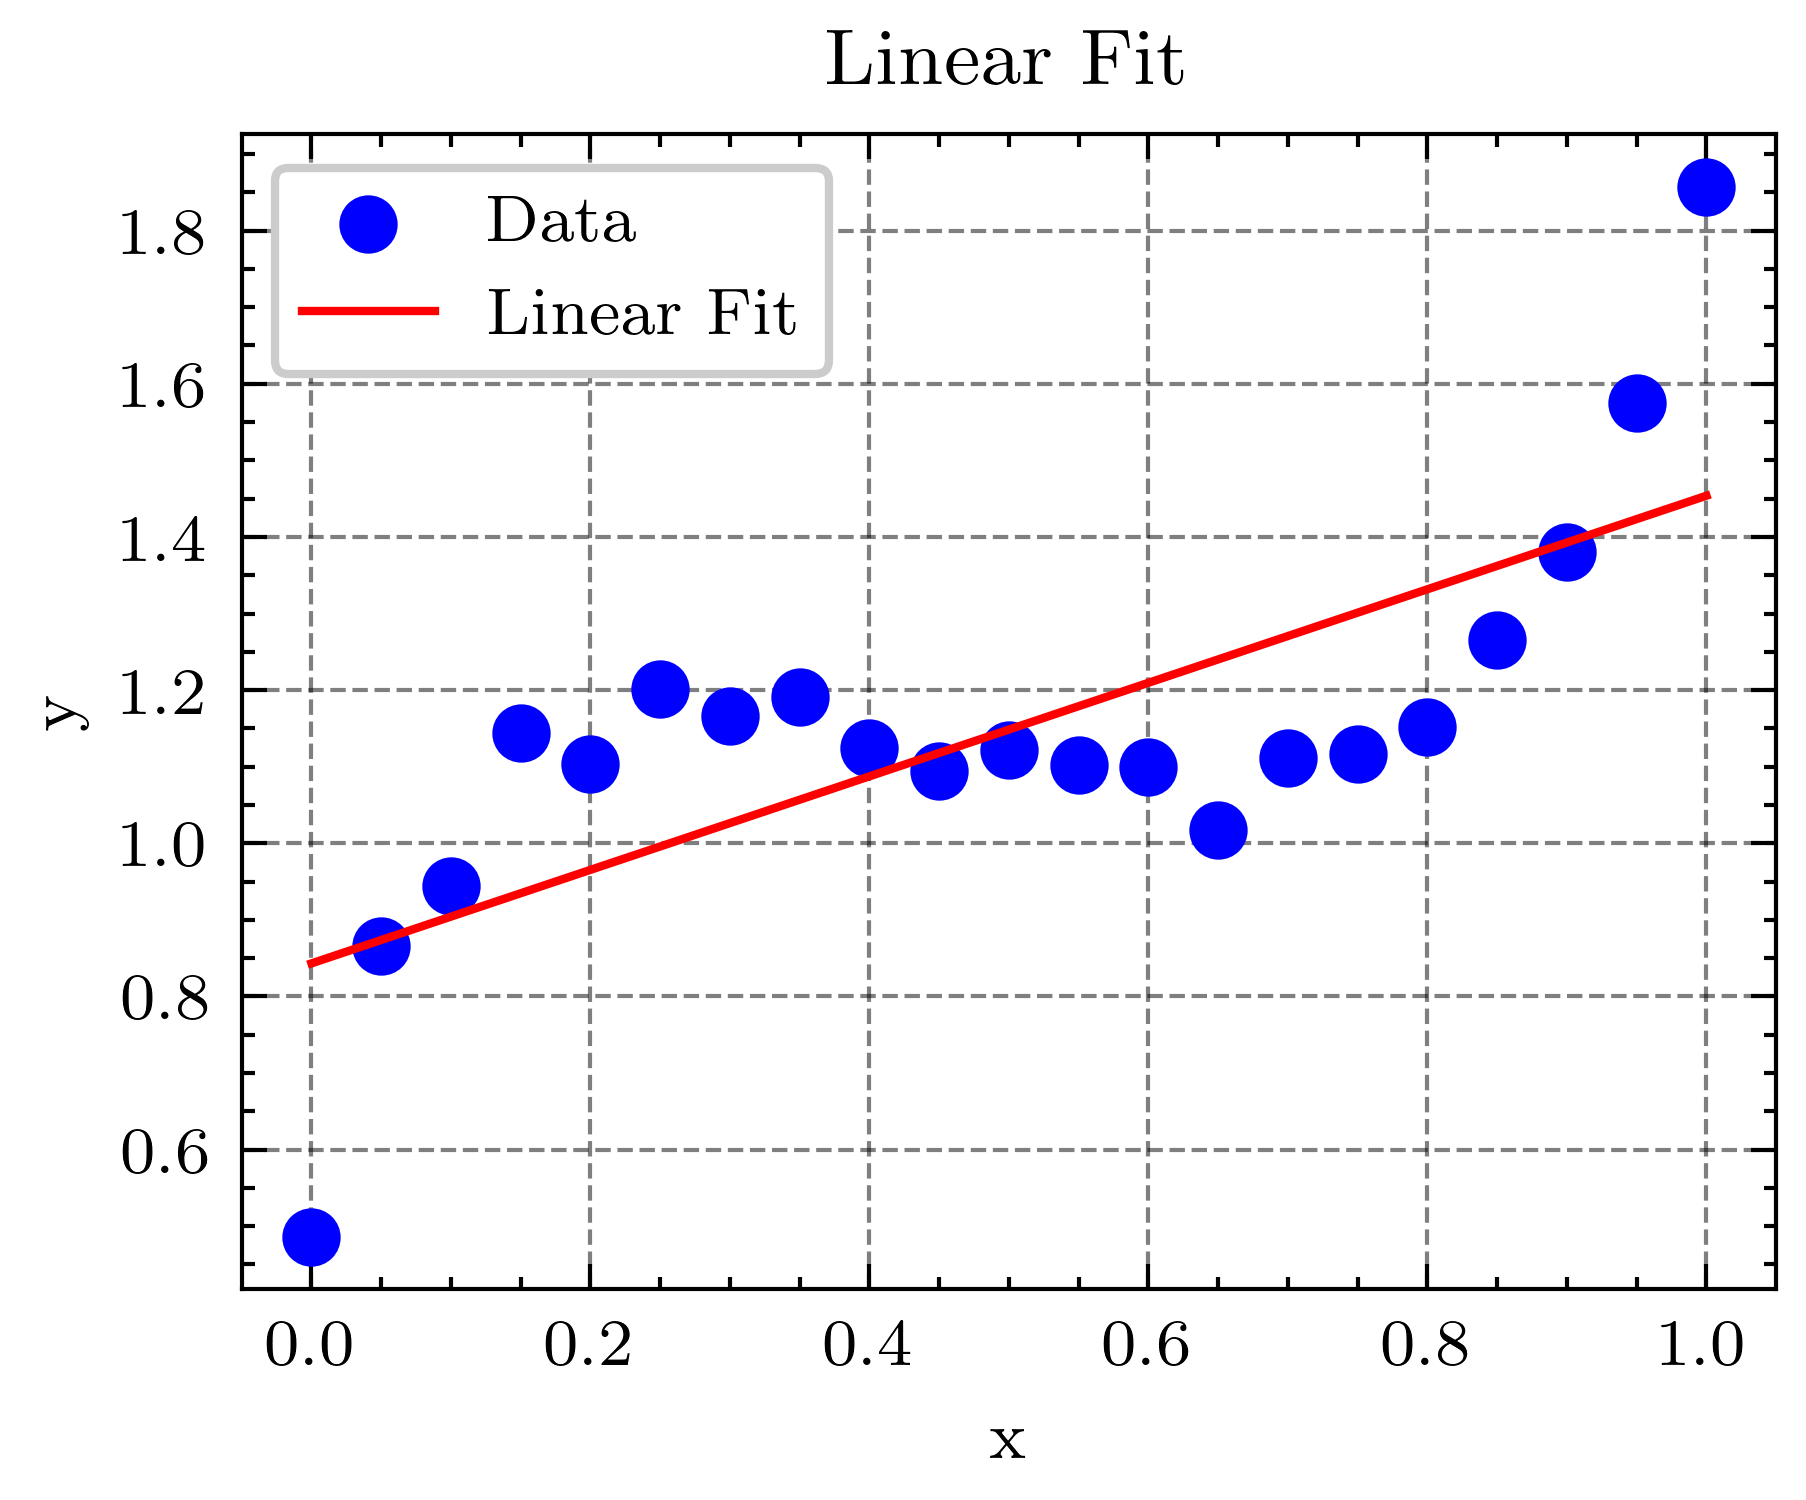

In [18]:
# Plot the data and linear fit
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, [coefficients[0] + coefficients[1] * xi for xi in x], label='Linear Fit', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
w, A_pol = polyfit_with_basis(x, y, degree=3)
for i, wi in enumerate(w): print(f"a{i} = {wi:.4f}")

a0 = 0.5747
a1 = 4.7259
a2 = -11.1282
a3 = 7.6687


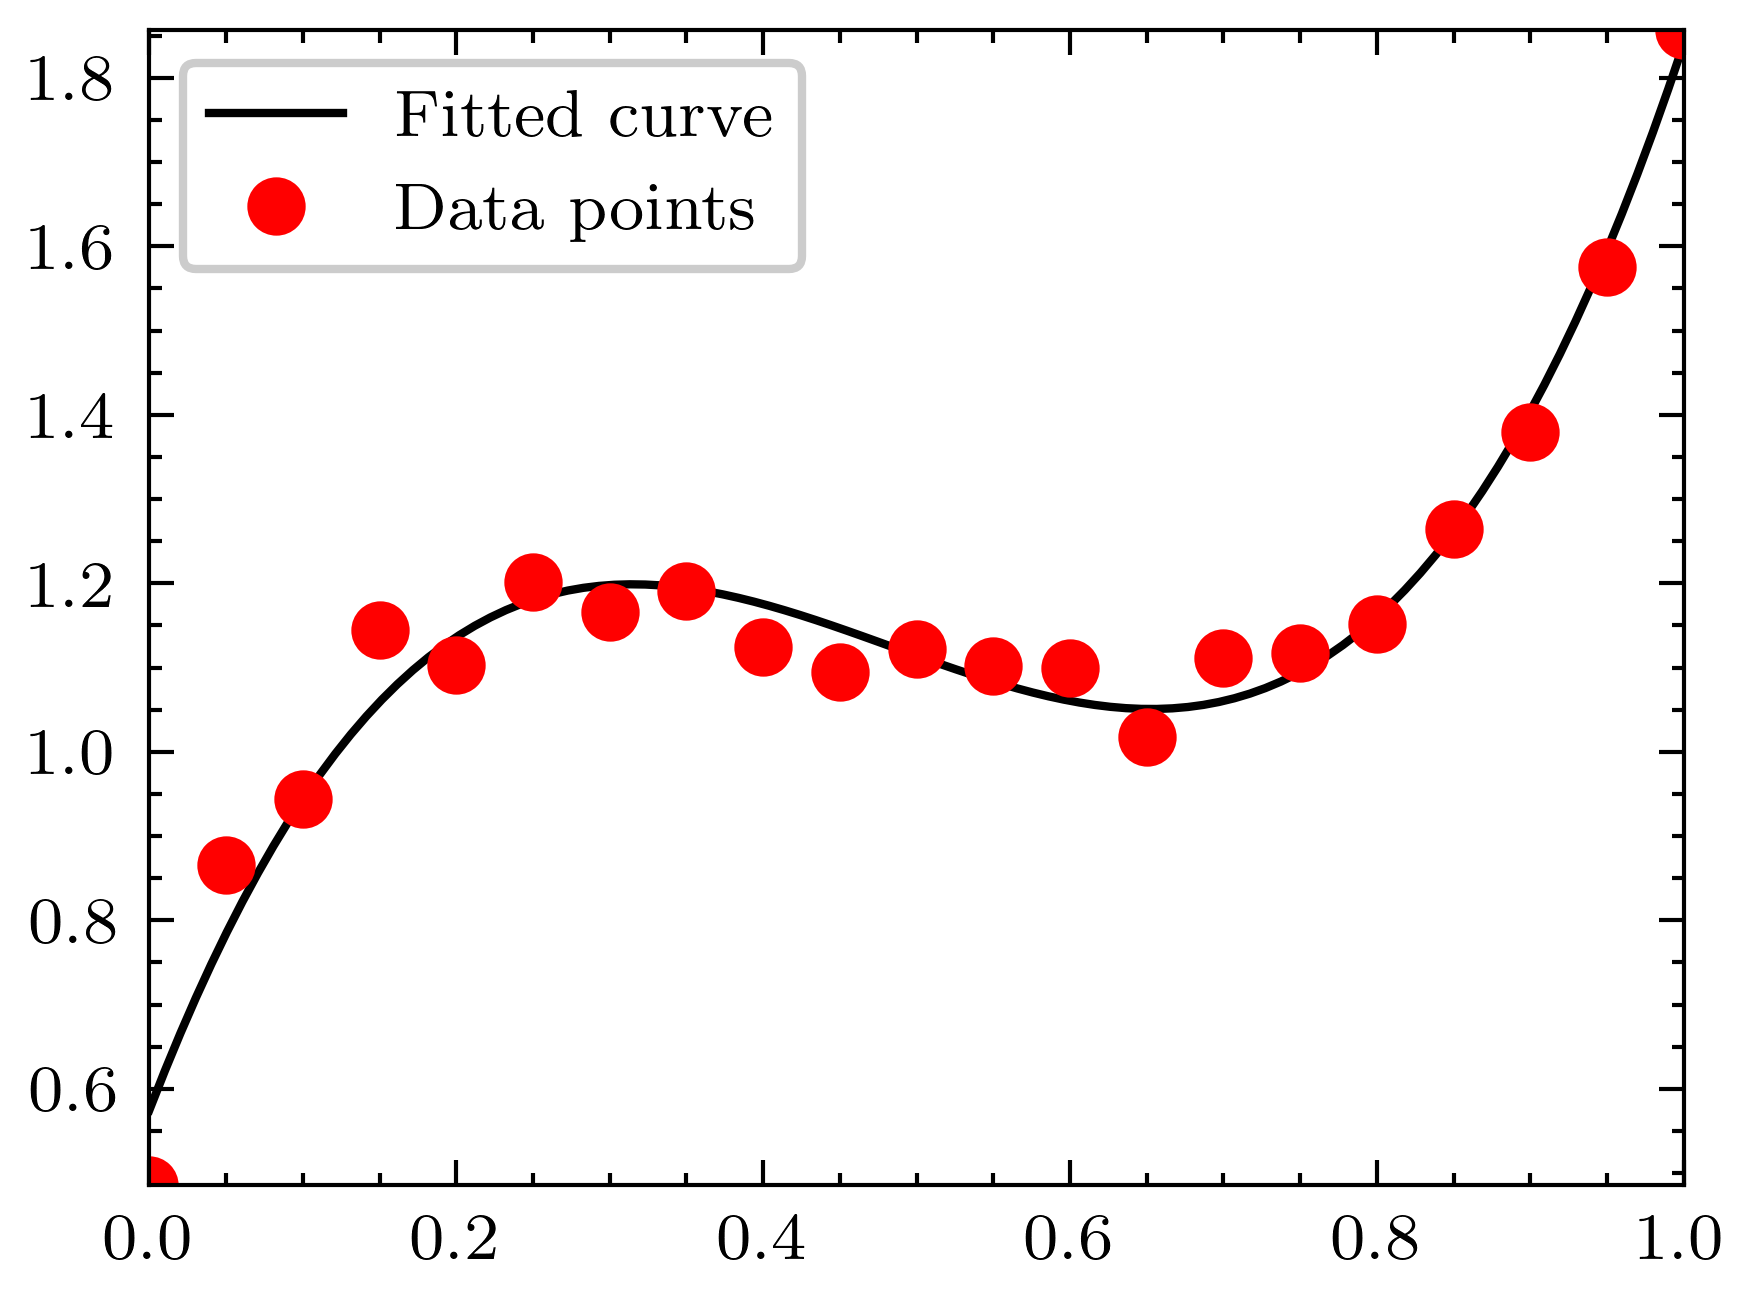

In [20]:
space = np.linspace(min(x), max(x), 100)
ys = np.polyval(w[::-1], space)  # elegant way of writing y = w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3
plt.plot(space, ys, label="Fitted curve")
plt.plot(x, y, 'o', label="Data points")
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.legend()
plt.grid()

a0 = 1.1610
a1 = 0.3935
a2 = 0.0468
a3 = 0.2396


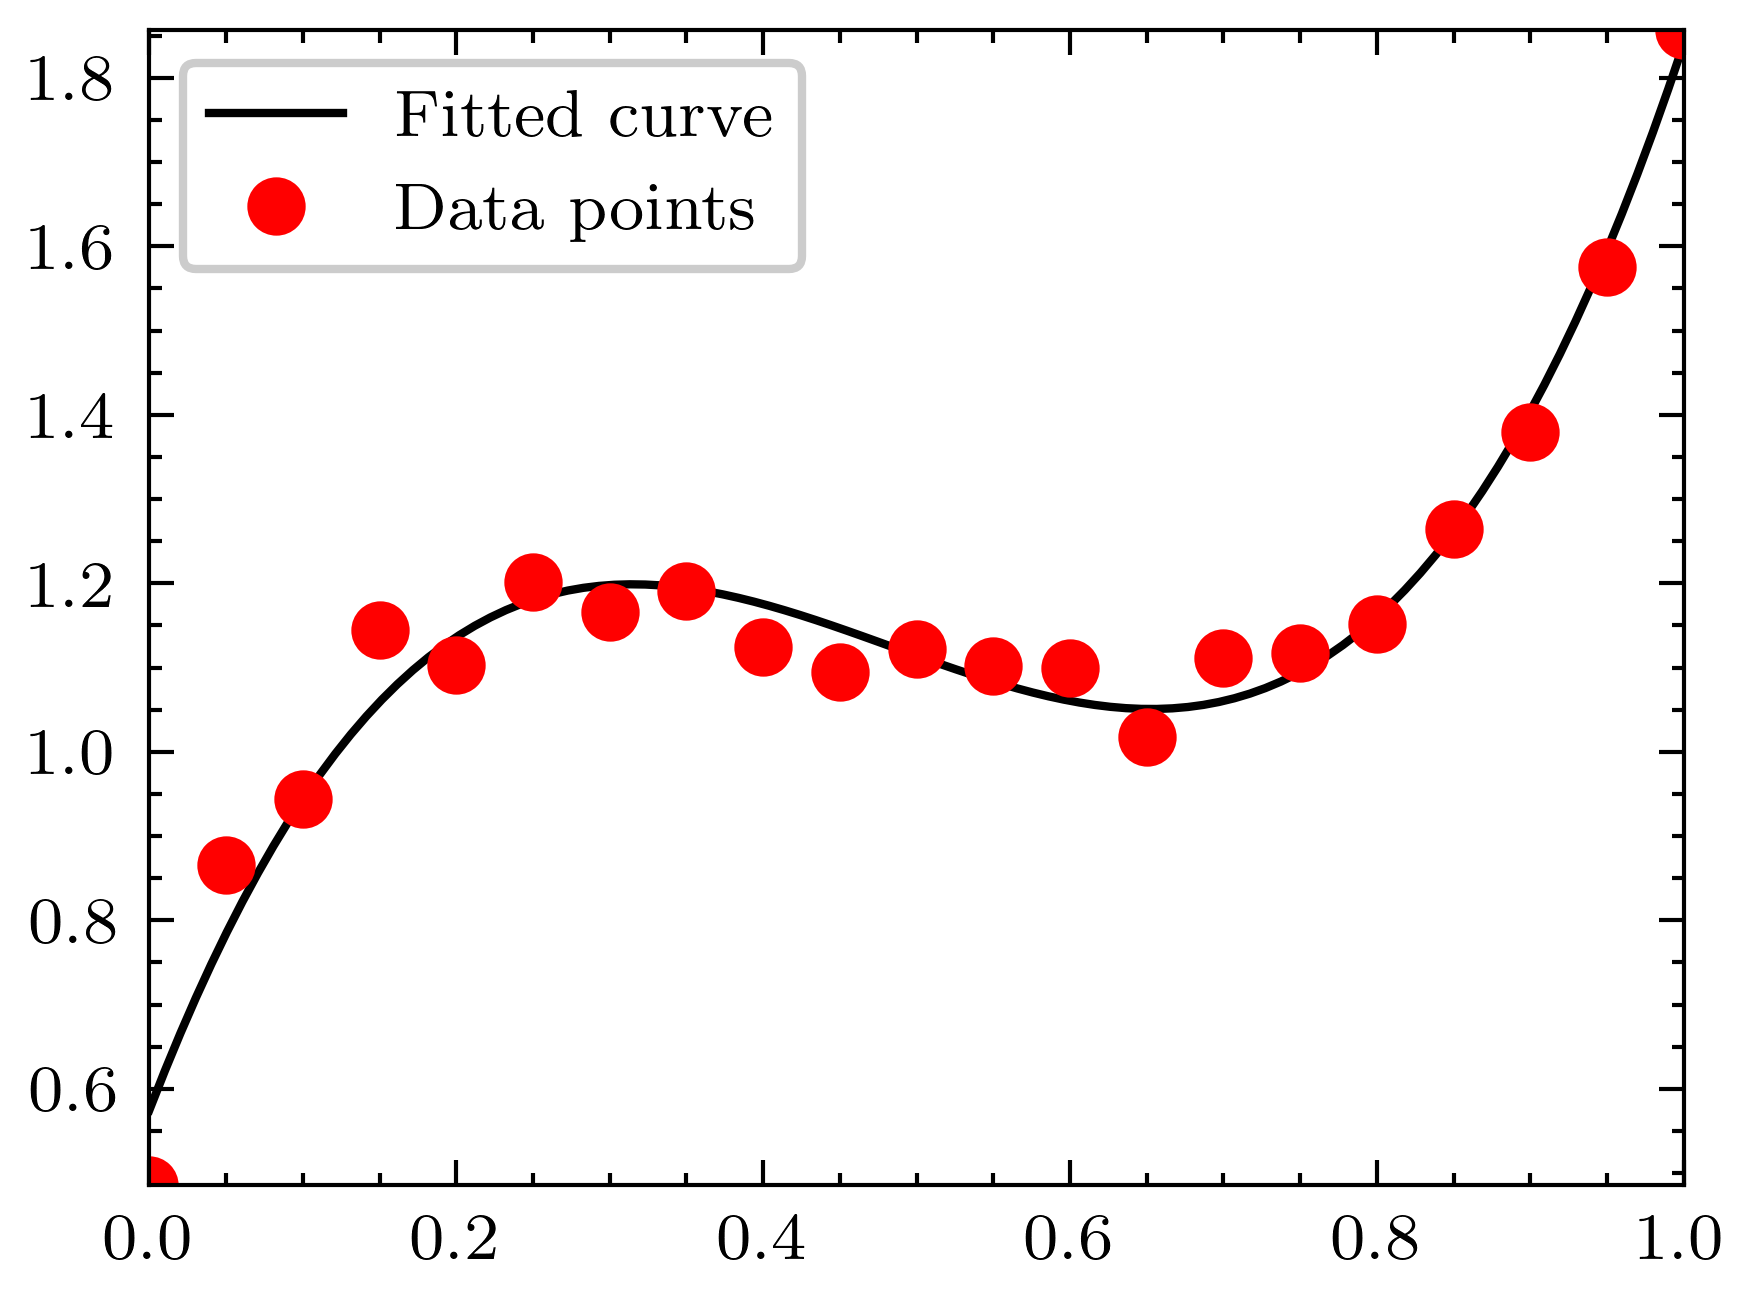

In [37]:
phis = [
    lambda x: 1,
    lambda x: 2*x-1,
    lambda x: 8*x**2 - 8*x + 1,
    lambda x: 32*x**3 - 48*x**2 + 18*x - 1
]

w, A_bas = polyfit_with_basis(x, y, degree=3, basis=phis)
for i, wi in enumerate(w): print(f"a{i} = {wi:.4f}")

# plotting the fitted curve
space = np.linspace(min(x), max(x), 100)
ys = w[0]*phis[0](space) + w[1]*phis[1](space) + w[2]*phis[2](space) + w[3]*phis[3](space)
plt.plot(space, ys, label="Fitted curve")
plt.plot(x, y, 'o', label="Data points")
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.legend()
plt.grid()

In [38]:
cn_poly = np.linalg.cond(A_pol)
cn_chev = np.linalg.cond(A_bas)

print(f"Condition number for basic polynomial fit: {cn_poly}")
print(f"Condition number for changed basis poly fit: {cn_chev}")

Condition number for basic polynomial fit: 12104.94867103216
Condition number for changed basis poly fit: 3.8561465786155806
